## Decision Tree

In [1]:
'''loading reqired packages'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
'''importing data set'''
import pandas as pd
file = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease')         # Main dataframe sheet
df.shape

(908, 13)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
print(abr)   # description of columns.

         age                                       Age in years
0     Gender                       Gender ; Male - 1, Female -0
1         cp                                    Chest pain type
2   trestbps                             Resting blood pressure
3       chol                                cholesterol measure
4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5    restecg  ecg observation at resting condition,   -- Val...
6     thalch                        maximum heart rate achieved
7      exang                            exercise induced angina
8    oldpeak  ST depression induced by exercise relative to ...
9      slope          the slope of the peak exercise ST segment
10      thal                                               Thal
11       num  target [0=no heart disease; 1,2,3,4 = stages o...


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


## EDA

In [6]:
# Check for null values.
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Handling missing values
df.fillna(df.mean(), inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_19276\3147223895.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
# Check for duplicates
df.duplicated().any()

True

In [9]:
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


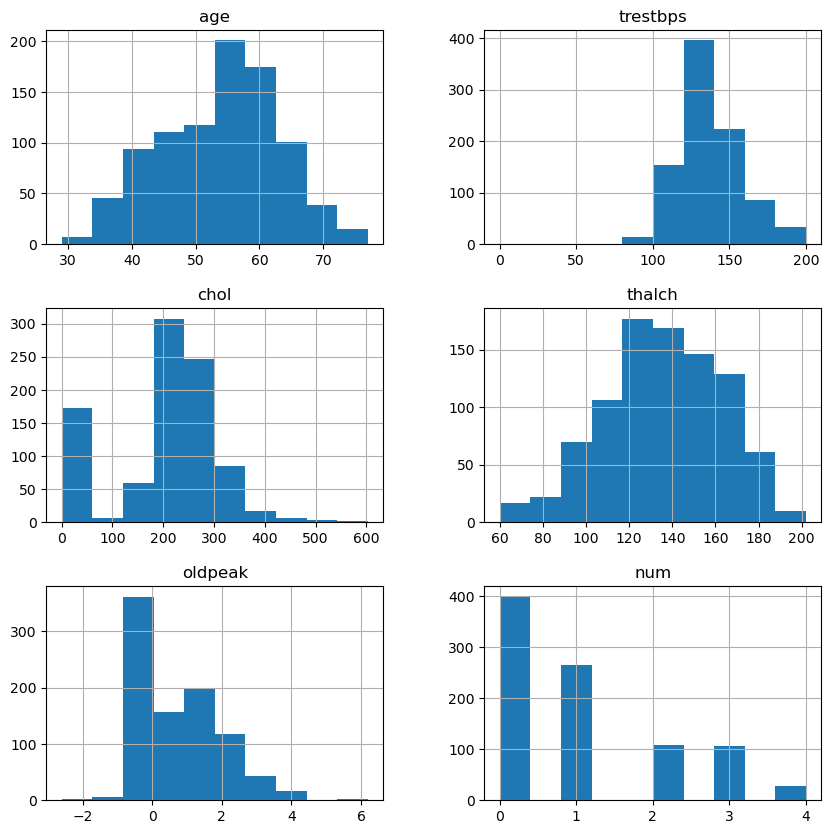

In [10]:
df.hist(figsize=(10,10),bins=10)
plt.show()

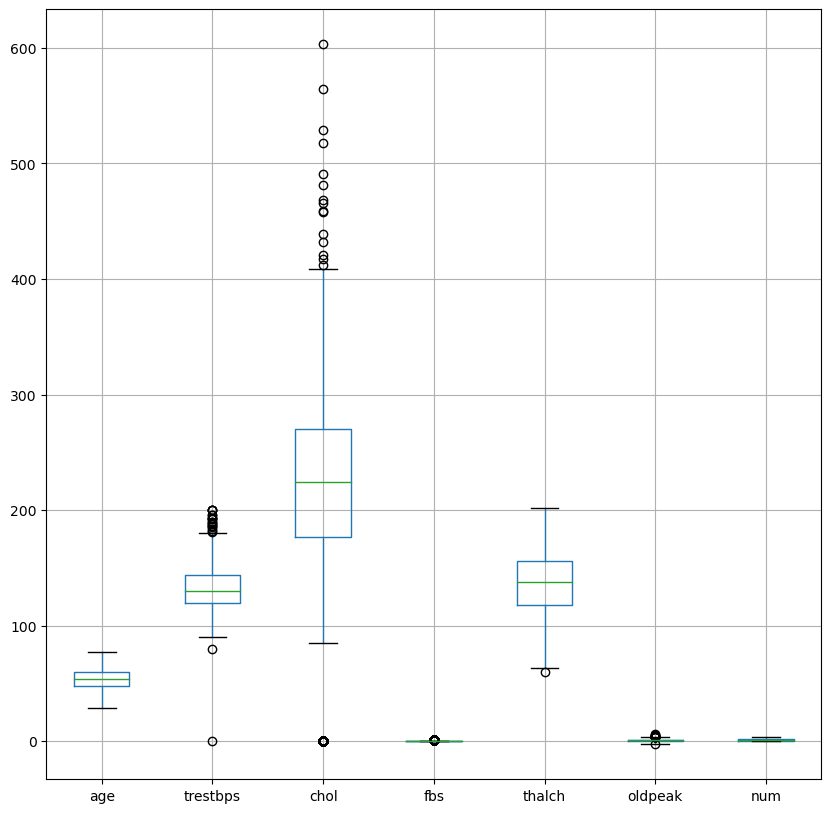

In [11]:
df.boxplot(figsize=(10,10))
plt.show()

### Correlation matrices

In [12]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()

# Correlatino matrix for numerical columns
num_corr=df[num_cols].corr()

# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)


Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253709,-0.100059,-0.327868,0.233265,0.326227
trestbps,0.253709,1.000000,0.117392,-0.132841,0.153034,0.136581
chol,-0.100059,0.117392,1.000000,0.198074,0.028901,-0.239065
thalch,-0.327868,-0.132841,0.198074,1.000000,-0.129435,-0.322632
oldpeak,0.233265,0.153034,0.028901,-0.129435,1.000000,0.417724
num,0.326227,0.136581,-0.239065,-0.322632,0.417724,1.000000


## Feature Engineering

In [13]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))


In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

## Decision Tree Classification:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, roc_auc_score

In [16]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
df.isnull().any()

age                         False
trestbps                    False
chol                        False
fbs                         False
thalch                      False
oldpeak                     False
num                         False
sex_Male                    False
cp_atypical angina          False
cp_non-anginal              False
cp_typical angina           False
restecg_normal              False
restecg_st-t abnormality    False
exang_True                  False
exang_FALSE                 False
exang_TURE                  False
slope_flat                  False
slope_upsloping             False
thal_normal                 False
thal_reversable defect      False
dtype: bool

In [17]:
df['num']

0     -0.880901
1     -0.880901
2     -0.880901
3     -0.880901
4     -0.880901
         ...   
903    2.615717
904    2.615717
905    2.615717
906    2.615717
907    2.615717
Name: num, Length: 907, dtype: float64

In [43]:
# Split the dataset into training and testing 
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)


In [44]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7582417582417582
Precision: 0.7453569821990874
Recall: 0.7582417582417582
F1 Score: 0.7501831501831502
ROC-AUC: 0.6512148337595908


## Hyperparameter Tuning:

In [45]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}
# Create a DecisionTreeClassifier instance
dt_clf=DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Best Hyperparameters:')
print(best_params)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Accuracy: 0.7912087912087912
Precision: 0.7996336996336996
Recall: 0.7912087912087912
F1 Score: 0.7416108795419141
ROC-AUC: 0.6013427109974425


## Model Evaluation and Analysis

In [56]:
import matplotlib.pyplot as plt

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

[[134   2]
 [ 36  10]]
age: 0.30879325204836616
trestbps: 0.11661961646384285
chol: 0.26848254559349466
fbs: 0.0
thalch: 0.06246954410069259
oldpeak: 0.24363504179360376
sex_Male: 0.0
cp_atypical angina: 0.0
cp_non-anginal: 0.0
cp_typical angina: 0.0
restecg_normal: 0.0
restecg_st-t abnormality: 0.0
exang_True: 0.0
exang_FALSE: 0.0
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.0


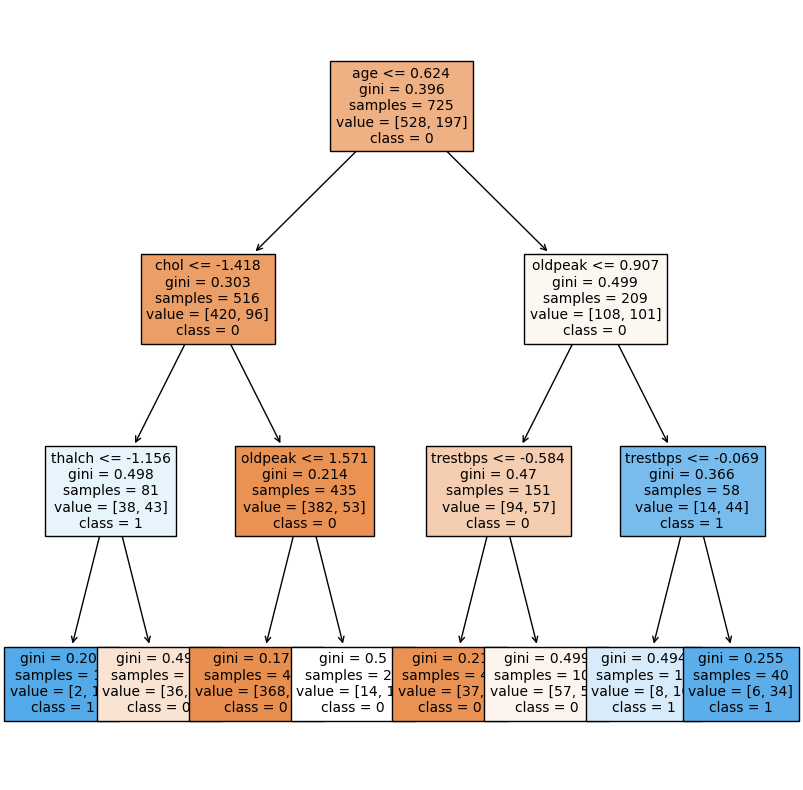

In [75]:
# Visualize the decision tree

from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

In [51]:
# Evaluate the model performance using the obtained metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7912087912087912
Precision: 0.7996336996336996
Recall: 0.7912087912087912
F1 Score: 0.7416108795419141
ROC-AUC: 0.6013427109974425


In [62]:
?? plot_tree